In [3]:
%matplotlib inline
from pylab import *
from numpy import *
import neuron
import pyNN
from pyNN import neuron
from pyNN.standardmodels import electrodes, build_translations, StandardCurrentSource
from pyNN.parameters import ParameterSpace, Sequence
from pyNN.neuron import simulator
from pyNN.utility import get_simulator, normalized_filename
from pyNN.utility.plotting import Figure, Panel
from neuron import h
from quantities import mV,Hz, s ,ms
import elephant.kernels as kernels

In [4]:
amps = linspace(-5, 5, 20)
cell = neuron.Population(20, neuron.IF_curr_exp(v_thresh = -50.0, tau_refrac = 5.0, tau_m = 10.0))
for cell_id in arange(0,19):
    pulse = neuron.ACSource(start = 20.0, stop = 80.0, amplitude = amps[cell_id], offset = 0.1, frequency = 10, phase = 180.0)
    cell[cell_id].inject(pulse)

In [5]:
cell.record('v')

In [6]:
neuron.run(100.0)

100.00000000001417

In [7]:
vm = cell.get_data().segments[0].filter(name = "v")[0]

In [8]:
vm
savetxt('cellrun.sav', vm)
print (vm)

[[-65.         -65.         -65.         ... -65.         -65.
  -65.        ]
 [-65.         -65.         -65.         ... -65.         -65.
  -65.        ]
 [-65.         -65.         -65.         ... -65.         -65.
  -65.        ]
 ...
 [-66.21770488 -65.67494721 -65.68835934 ... -64.5778564  -64.53966021
  -65.        ]
 [-66.21466821 -65.67326405 -65.68664273 ... -64.57890913 -64.54080819
  -65.        ]
 [-66.21163911 -65.67158509 -65.68493041 ... -64.57995923 -64.5419533
  -65.        ]] mV


In [9]:
neuron.end()

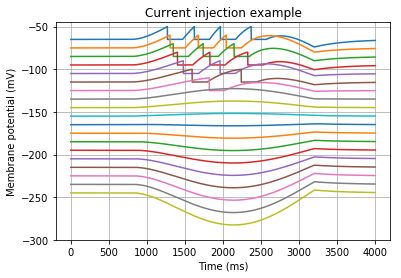

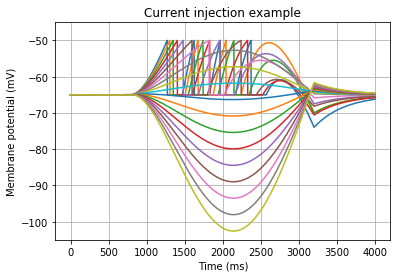

In [10]:
plt.figure()
for cell_id in arange(0,19):
    plt.plot(vm[:,cell_id]-10*mV*cell_id)
plt.grid()
plt.xlabel("Time (ms)")
plt.ylabel("Membrane potential (mV)")
plt.ylim(-300, -45)
plt.title("Current injection example");
plt.figure()
for cell_id in arange(0,19):
    plt.plot(vm[:, cell_id])
plt.grid()
plt.xlabel("Time (ms)")
plt.ylabel("Membrane potential (mV)")
plt.ylim(-105, -45)
plt.title("Current injection example");

In [11]:
vm[:,0]

AnalogSignal with 1 channels of length 4001; units mV; datatype float64 
name: 'v'
annotations: {'source_ids': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19]), 'source_population': 'population0'}
sampling rate: 40.0
time: 0.0 to 100.025

In [12]:
import elephant as ep

In [13]:
from elephant.spike_train_generation import threshold_detection

In [48]:
trains = {}
for cell_id in arange(0,19):
    trains[cell_id] = threshold_detection(vm[:,cell_id], threshold=-50.01*mV, sign='above')

In [54]:
for train in trains.values():
    if (len(train) == 0)
    print(train)

[31.725 40.575 49.125 59.25 ] ms
[32.575 41.85  51.025] ms
[33.65  43.475 53.625] ms
[35.025 45.675 58.1  ] ms
[36.925 49.   ] ms
[39.825 55.95 ] ms
[45.45] ms


NameError: name 'trns' is not defined

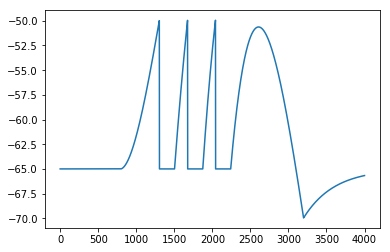

In [55]:
plt.plot(vm[:,1])

In [56]:
from elephant.spike_train_dissimilarity import victor_purpura_dist

[[0.      1.20125 1.46625 1.395   2.18875 2.2025  3.18375 4.      4.
  4.      4.      4.      4.      4.      4.      4.      4.      4.
  4.     ]
 [1.20125 0.      0.265   0.6675  1.31875 1.3475  2.18    3.      3.
  3.      3.      3.      3.      3.      3.      3.      3.      3.
  3.     ]
 [1.46625 0.265   0.      0.4025  1.395   1.29875 2.09875 3.      3.
  3.      3.      3.      3.      3.      3.      3.      3.      3.
  3.     ]
 [1.395   0.6675  0.4025  0.      1.26125 1.3475  2.01125 3.      3.
  3.      3.      3.      3.      3.      3.      3.      3.      3.
  3.     ]
 [2.18875 1.31875 1.395   1.26125 0.      0.4925  1.1775  2.      2.
  2.      2.      2.      2.      2.      2.      2.      2.      2.
  2.     ]
 [2.2025  1.3475  1.29875 1.3475  0.4925  0.      1.28125 2.      2.
  2.      2.      2.      2.      2.      2.      2.      2.      2.
  2.     ]
 [3.18375 2.18    2.09875 2.01125 1.1775  1.28125 0.      1.      1.
  1.      1.      1.      1.      1. 

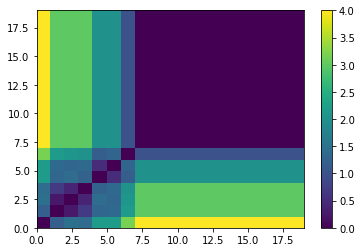

In [57]:
distance_matrix1 = victor_purpura_dist(trains.values(), q=array(50.0) * Hz)
plt.pcolor(distance_matrix1)
plt.colorbar()
print(distance_matrix1)

In [58]:
trains[0][0]

array(31.725) * ms

In [59]:
trains[8].dimensionality.simplified

Dimensionality({second: 1})

In [60]:
import neo
import quantities as pq
for cell_id in arange(0,19):
    print(pq.Quantity(50, "s").dimensionality.simplified,trains[cell_id].dimensionality.simplified,isinstance(trains[4], (pq.quantity.Quantity, neo.core.SpikeTrain)))

s s True
s s True
s s True
s s True
s s True
s s True
s s True
s s True
s s True
s s True
s s True
s s True
s s True
s s True
s s True
s s True
s s True
s s True
s s True


In [61]:
isinstance(trains[16], (pq.quantity.Quantity, neo.core.SpikeTrain))

True

In [62]:
import neo

In [63]:
type(trains[10])

neo.core.spiketrain.SpikeTrain

In [64]:
cell = neuron.Population(10, neuron.IF_curr_exp(v_thresh = -50.0, tau_refrac = 5.0, tau_m = 10.0))

In [65]:
from elephant.spike_train_dissimilarity import van_rossum_dist

[[0.         1.00000002 1.00000004 1.00000003 1.99976255 1.99980054
  2.99963306 3.99954443 3.99954443 3.99954443 3.99954443 3.99954443
  3.99954443 3.99954443 3.99954443 3.99954443 3.99954443 3.99954443
  3.99954443]
 [1.00000002 0.         0.01455983 0.0231069  1.00000002 1.00019694
  1.99985152 2.99975402 2.99975402 2.99975402 2.99975402 2.99975402
  2.99975402 2.99975402 2.99975402 2.99975402 2.99975402 2.99975402
  2.99975402]
 [1.00000004 0.01455983 0.         0.01794364 1.00000002 1.00009299
  1.99982003 2.99973369 2.99973369 2.99973369 2.99973369 2.99973369
  2.99973369 2.99973369 2.99973369 2.99973369 2.99973369 2.99973369
  2.99973369]
 [1.00000003 0.0231069  0.01794364 0.         1.00000003 1.00000002
  1.99977154 2.99969237 2.99969237 2.99969237 2.99969237 2.99969237
  2.99969237 2.99969237 2.99969237 2.99969237 2.99969237 2.99969237
  2.99969237]
 [1.99976255 1.00000002 1.00000002 1.00000003 0.         0.01984846
  1.00000001 1.99987926 1.99987926 1.99987926 1.99987926 1.9

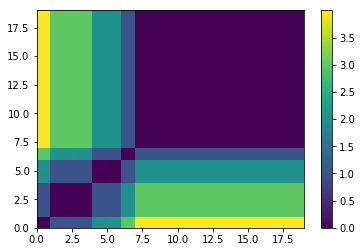

In [66]:
distance_matrix2 = van_rossum_dist(trains.values(), tau=array(50.0) * pq.s, sort = True)
plt.pcolor(distance_matrix2)
plt.colorbar()
print(distance_matrix2)

In [67]:
from elephant.statistics import cost_function, isi, cv
from elephant.spike_train_generation import homogeneous_poisson_process

In [70]:
corrcoef(distance_matrix1)
savetxt('pupuracorrcoef.sav', corrcoef(distance_matrix1))
savetxt('pupuracorrcoef.txt', corrcoef(distance_matrix1))
print(corrcoef(distance_matrix1))

[[ 1.          0.92181484  0.89473914  0.90116827  0.45532917  0.45235767
  -0.83995705 -0.99685172 -0.99685172 -0.99685172 -0.99685172 -0.99685172
  -0.99685172 -0.99685172 -0.99685172 -0.99685172 -0.99685172 -0.99685172
  -0.99685172]
 [ 0.92181484  1.          0.99308583  0.97648195  0.61034118  0.61103271
  -0.69459071 -0.94417209 -0.94417209 -0.94417209 -0.94417209 -0.94417209
  -0.94417209 -0.94417209 -0.94417209 -0.94417209 -0.94417209 -0.94417209
  -0.94417209]
 [ 0.89473914  0.99308583  1.          0.98796181  0.62145142  0.6280906
  -0.65595026 -0.92481375 -0.92481375 -0.92481375 -0.92481375 -0.92481375
  -0.92481375 -0.92481375 -0.92481375 -0.92481375 -0.92481375 -0.92481375
  -0.92481375]
 [ 0.90116827  0.97648195  0.98796181  1.          0.64592019  0.6383456
  -0.64375381 -0.93094939 -0.93094939 -0.93094939 -0.93094939 -0.93094939
  -0.93094939 -0.93094939 -0.93094939 -0.93094939 -0.93094939 -0.93094939
  -0.93094939]
 [ 0.45532917  0.61034118  0.62145142  0.64592019  1. 

In [71]:
corrcoef(distance_matrix2)
savetxt('van_rossum.sav', corrcoef(distance_matrix2))
savetxt('van_rossum.txt', corrcoef(distance_matrix2))
print(corrcoef(distance_matrix2))

[[ 1.          0.94763565  0.94758677  0.94766517  0.60099338  0.60095063
  -0.77200286 -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.        ]
 [ 0.94763565  1.          0.99999157  0.99997957  0.74633555  0.74629465
  -0.62615264 -0.94764612 -0.94764612 -0.94764612 -0.94764612 -0.94764612
  -0.94764612 -0.94764612 -0.94764612 -0.94764612 -0.94764612 -0.94764612
  -0.94764612]
 [ 0.94758677  0.99999157  1.          0.99998671  0.74622962  0.74618899
  -0.6261808  -0.94759723 -0.94759723 -0.94759723 -0.94759723 -0.94759723
  -0.94759723 -0.94759723 -0.94759723 -0.94759723 -0.94759723 -0.94759723
  -0.94759723]
 [ 0.94766517  0.99997957  0.99998671  1.          0.74642402  0.7463837
  -0.62611797 -0.94767559 -0.94767559 -0.94767559 -0.94767559 -0.94767559
  -0.94767559 -0.94767559 -0.94767559 -0.94767559 -0.94767559 -0.94767559
  -0.94767559]
 [ 0.60099338  0.74633555  0.74622962  0.74642402  1.          0.9999

In [72]:
from elephant.statistics import complexity_pdf
from elephant.statistics import cost_function
from elephant.sta import spike_field_coherence

In [84]:
spike_field_coherence?

In [42]:
complexity_pdf?

In [83]:
cost_function?

In [82]:
complex = complexity_pdf(40 * Hz, trains)

TypeError: iteration over a 0-d array

In [45]:
trains.values?

Object `trains.values` not found.
